# Potato Disease Classification

# Problem Statement

    The aim of this project is to develop a potato plant disease classification system using Convolutional Neural Networks (CNN). The system should accurately classify images of potato plants into different disease categories.

# Brief Description

    This case study focuses of deep learning techniques for the classification of potato diseases based on plant images. The objective is to develop an accurate and efficient model that can automatically identify and classify different potato diseases. By leveraging deep learning, this study aims to provide a valuable tool for farmers and agricultural experts to detect and manage potato diseases, leading to improved crop yields and reduced losses. The case study covers the dataset used, the deep learning methodology employed, and the evaluation of the developed classification model

    Farmers who grow potatoes suffer from serious financial standpoint losses each year which cause several diseases that affect potato plants. The diseases Early Blight and Late Blight are the most frequent.

    Early blight is a disease of potato caused by the fungus Alternaria solani. It is found wherever potatoes are grown. The disease primarily affects leaves and stems, but under favorable weather conditions, and if left uncontrolled, can result in considerable defoliation and enhance the chance for tuber infection.

    Late blight caused by the Phytophthora infestans is the most important disease of potato that can result into crop failures in a short period if appropriate control measures are not adopted.

    Early blight is caused by fungus and late blight is caused by specific micro-organisms and if farmers detect this disease early and apply appropriate treatment then it can save a lot of waste and prevent economical loss. The treatments for early blight and late blight are a little different so it’s important that you accurately identify what kind of disease is there in that potato plant.

    Our Goal is to classify the the type of disease in the potato plant Thus, we have three classes

                          Healthy
                          Early Blight
                          Late Blight

# APPROCH TO THE SOLUTION

DATA COLLECTION


IMPORT REQUIRED LIBRARIES


READ IMAGES USING IMAGE GENERATOR


VISUALIZE THE IMAGES


RESCALE THE IMAGES BY NORMALIZING


CREATING MODEL ARCHITEHTURE

COMPILE THE MODEL


CHECK OVERFITTING


APPLY DROPOUT,L2 REGULARIZATION 


FIT THE MODEL


PLOT ACUURACY AND LOSS


MODEL SUMMARY


EVALUAVATION METRICS


PREDICTION ON TEST IMAGES




# Required Libraries

In [59]:
import warnings
warnings.filterwarnings('ignore')

In [60]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Adam


In [61]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img ,img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping

# Read Images Using ImageGenerator

In [62]:
my_data_dir = r"C:\Users\Admin\Desktop\PotatoDisease"
train_path = my_data_dir + '/train/'
test_path = my_data_dir + '/test/'
valid_path = my_data_dir + '/valid/'

image_shape = (128,128,3)
batch_size = 32

# PLOT IMAGES

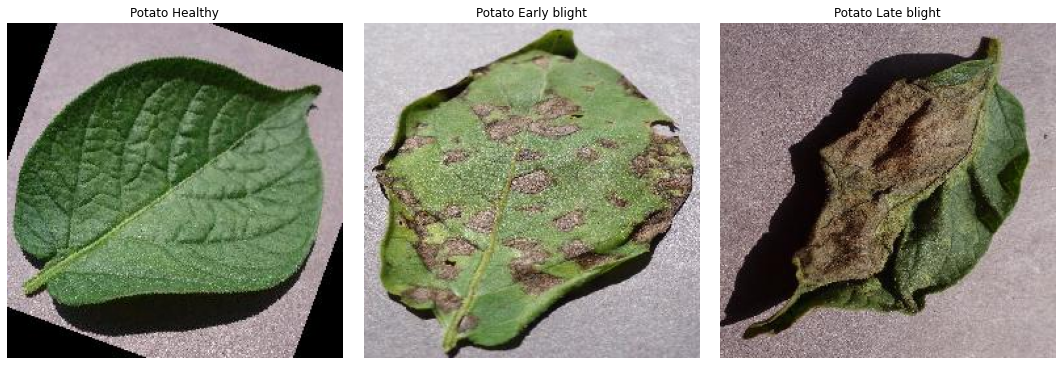

In [77]:
plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
img1 = plt.imread(my_data_dir+r"\train\Potato Healthy\PotatoHealthy(27).JPG")
plt.imshow(img1)
plt.title('Potato Healthy')
plt.axis('off')


plt.subplot(1, 3, 2)
img2 = plt.imread(my_data_dir+r"\train\Potato Early blight\PotatoEarlyBlight(16).JPG")
plt.imshow(img2)
plt.title('Potato Early blight')
plt.axis('off')


plt.subplot(1, 3, 3)
img3 = plt.imread(my_data_dir+r"\train\Potato Late blight\PotatoLateBlight(416).JPG")
plt.imshow(img3)
plt.title('Potato Late blight')
plt.axis('off')

plt.tight_layout()
plt.show()


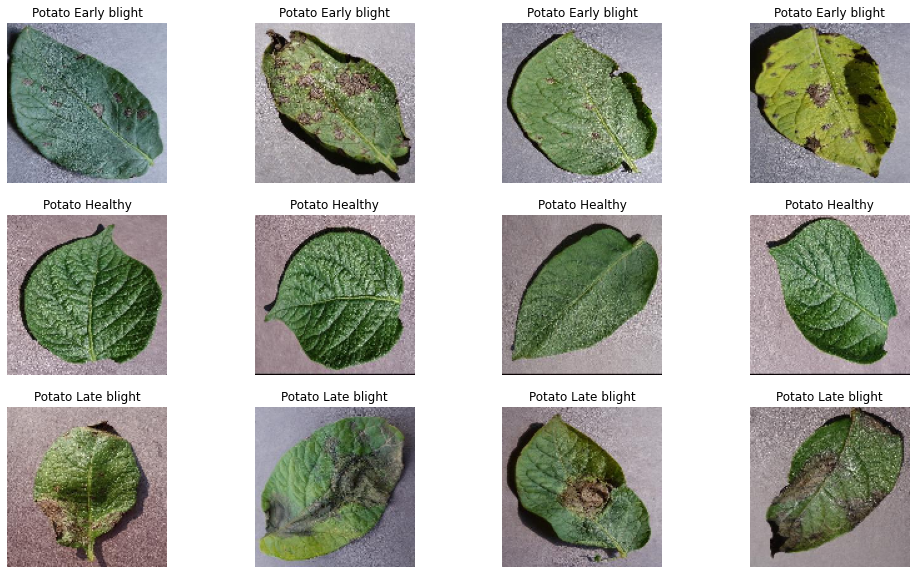

In [81]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img

my_data_dir = r"C:\Users\Admin\Desktop\PotatoDisease"
train_path = os.path.join(my_data_dir, 'train')
class_names = os.listdir(train_path)

# Display 12 images from the dataset
plt.figure(figsize=(17, 10))
for i in range(12):
    image_path = os.path.join(train_path, class_names[i // 4], os.listdir(os.path.join(train_path, class_names[i // 4]))[i % 4])
    image = load_img(image_path, target_size=(128, 128))
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(image)
    plt.title(class_names[i // 4])
    plt.axis("off")

plt.show()


##### Check Image shape

In [49]:
img.shape

(256, 256, 3)

In [50]:
img.shape[:2]

(256, 256)

##### Rescale the image by normalzing

In [51]:
image_gen = ImageDataGenerator(rescale=1/255.)

##### Read Data from directory

In [52]:
train_set = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode='sparse',shuffle=True)

test_set = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode='sparse',shuffle=False)

valid_set = image_gen.flow_from_directory(valid_path,
                                               target_size=image_shape[:2],
                                               color_mode="rgb",
                                               batch_size=batch_size,
                                               class_mode='sparse',shuffle=False)





Found 9485 images belonging to 3 classes.
Found 1904 images belonging to 3 classes.
Found 25 images belonging to 3 classes.


###### Check the shape of images

In [53]:
train_set[0][0].shape

(32, 128, 128, 3)

##### Check train class label names

In [54]:
train_set.class_indices

{'Potato Early blight': 0, 'Potato Healthy': 1, 'Potato Late blight': 2}

##### Check test class label names

In [55]:
test_set.class_indices

{'Potato Early blight': 0, 'Potato Healthy': 1, 'Potato Late blight': 2}

# Creating Model Architechture

In [82]:

model = Sequential()

model.add(Conv2D(16, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(0.2))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(2e-0)))
model.add(Dropout(0.2))

model.add(Dense(3, activation='softmax'))

In [83]:
learning_rate = 0.001

optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [84]:
history= model.fit(train_set,epochs=50,
                              validation_data=test_set,
                              )

Epoch 1/50
297/297 [==============================] - 52s 173ms/step - loss: 12.2388 - accuracy: 0.6076 - val_loss: 0.9364 - val_accuracy: 0.7474
Epoch 2/50
297/297 [==============================] - 50s 167ms/step - loss: 0.8877 - accuracy: 0.8161 - val_loss: 0.7683 - val_accuracy: 0.9028
Epoch 3/50
297/297 [==============================] - 51s 171ms/step - loss: 0.8322 - accuracy: 0.8555 - val_loss: 0.6417 - val_accuracy: 0.9175
Epoch 4/50
297/297 [==============================] - 47s 157ms/step - loss: 0.7179 - accuracy: 0.8893 - val_loss: 0.5599 - val_accuracy: 0.9275
Epoch 5/50
297/297 [==============================] - 47s 158ms/step - loss: 0.6892 - accuracy: 0.8842 - val_loss: 0.5678 - val_accuracy: 0.9217
Epoch 6/50
297/297 [==============================] - 47s 158ms/step - loss: 0.6341 - accuracy: 0.8988 - val_loss: 0.5381 - val_accuracy: 0.9160
Epoch 7/50
297/297 [==============================] - 46s 155ms/step - loss: 0.6058 - accuracy: 0.9062 - val_loss: 0.5963 - val_a

# PLOT ACCURACY AND LOSS

In [85]:
def plot_history(history):
    hist = history.history

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(np.arange(1, len(hist['accuracy']) + 1), hist['accuracy'], label='Train Accuracy')
    plt.plot(np.arange(1, len(hist['val_accuracy']) + 1), hist['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(np.arange(1, len(hist['loss']) + 1), hist['loss'], label='Train Loss')
    plt.plot(np.arange(1, len(hist['val_loss']) + 1), hist['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

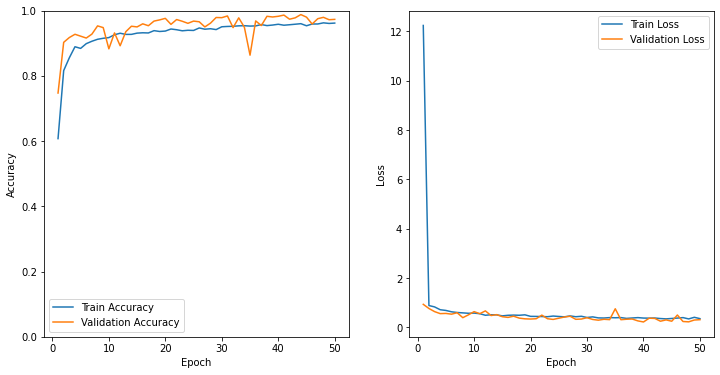

In [86]:
plot_history(history)

# MODEL SUMMARY

In [118]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 30, 30, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_8 (Dropout)         (None, 30, 30, 32)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 64)       

# MODEL SUMMARY INSIGHTS

Conv2D layer conv2d_9:

Output shape: (None, 126, 126, 16)
Parameters calculation: (3 * 3 * 3 + 1) * 16 = 448 parameters
MaxPooling2D layer max_pooling2d_9:

No parameters to learn, as it performs downsampling.
Conv2D layer conv2d_10:

Output shape: (None, 61, 61, 32)
Parameters calculation: (3 * 3 * 16 + 1) * 32 = 4,640 parameters
MaxPooling2D layer max_pooling2d_10:

No parameters to learn, as it performs downsampling.
Dropout layer dropout_8:

No parameters to learn, as it randomly drops units during training.
Conv2D layer conv2d_11:

Output shape: (None, 28, 28, 64)
Parameters calculation: (3 * 3 * 32 + 1) * 64 = 18,496 parameters
MaxPooling2D layer max_pooling2d_11:

No parameters to learn, as it performs downsampling.
Dropout layer dropout_9:

No parameters to learn, as it randomly drops units during training.
Flatten layer flatten_3:

No parameters to learn, as it reshapes the data without introducing new parameters.
Dense layer dense_4:

Output shape: (None, 128)
Parameters calculation: (12,544 + 1) * 128 = 1,605,760 parameters
Dropout layer dropout_10:

No parameters to learn, as it randomly drops units during training.
Dense layer dense_5:

Output shape: (None, 3)
Parameters calculation: (128 + 1) * 3 = 387 parameters
Total trainable parameters: 448 + 4,640 + 18,496 + 1,605,760 + 387 = 1,629,731

Therefore, the provided model has a total of 1,629,731 trainable parameters.

# ACCURACY AND LOSS

In [88]:
losses = pd.DataFrame(history.history)
losses.tail(10)

,loss,accuracy,val_loss,val_accuracy
40,0.376143,0.955298,0.374226,0.986345
41,0.381933,0.956774,0.365636,0.973740
42,0.360495,0.958355,0.252246,0.977941
43,0.347475,0.960042,0.306349,0.987920
44,0.363664,0.953611,0.251622,0.980042
45,0.379492,0.958988,0.502950,0.959034
46,0.398524,0.959093,0.240438,0.975315
47,0.345458,0.962572,0.226942,0.979517
48,0.410965,0.960780,0.300693,0.972164
49,0.356630,0.961834,0.314031,0.973214


    Training loss--0.35
    training accuracy--0.96
    
    validation_loss--0.31
    validation_accuracy--0.97
    

## Evaluavation metrics

In [89]:
from sklearn.metrics import classification_report,confusion_matrix

In [90]:
pred = model.predict(test_set)
pred = np.argmax(pred, axis=1)

labels = train_set.class_indices
labels = dict((v,k) for k, v in labels.items())

print(labels)
print(pred)

60/60 [==============================] - 3s 46ms/step
{0: 'Potato Early blight', 1: 'Potato Healthy', 2: 'Potato Late blight'}
[1 0 0 ... 2 2 1]


In [91]:
label_mapping = {'Potato Early blight': 0, 'Potato Healthy': 1, 'Potato Late blight': 2}




y_true = test_set.labels.astype(int)
y_pred = [label_mapping[labels[k]] for k in pred]

print(classification_report(y_true, y_pred))
print('--------------------------------')
print(confusion_matrix(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98       702
           1       0.94      1.00      0.97       460
           2       0.98      0.97      0.98       742

    accuracy                           0.97      1904
   macro avg       0.97      0.98      0.97      1904
weighted avg       0.97      0.97      0.97      1904

--------------------------------
[[674  15  13]
 [  0 459   1]
 [  6  16 720]]


# PREDICTION ON TEST IMAGES


##### TESTING EARLY BLIGHT

1/1 [==============================] - 0s 23ms/step
Predicted Label: Potato Early blight
Potato Early blight: 99.96%
Potato Healthy: 0.00%
Potato Late blight: 0.04%


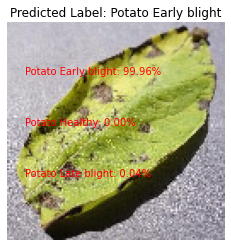

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image


external_image_path = r"C:\Users\Admin\Desktop\PotatoDisease\test\Potato Early blight\PotatoEarlyBlight(4).JPG"
external_image = image.load_img(external_image_path, target_size=image_shape[:2])
external_image = image.img_to_array(external_image)
external_image = np.expand_dims(external_image, axis=0)
external_image = external_image / 255.0  


predictions = model.predict(external_image)
predicted_class = np.argmax(predictions)


label_mapping = {0: 'Potato Early blight', 1: 'Potato Healthy', 2: 'Potato Late blight'}
predicted_label = label_mapping[predicted_class]


prediction_percentages = predictions[0] * 100


print("Predicted Label:", predicted_label)
for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    print(f"{class_label}: {percentage:.2f}%")


plt.imshow(external_image[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')

for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    plt.text(10, (i + 1) * 30, f"{class_label}: {percentage:.2f}%", color='red')

plt.show()


##### TESTING HEALTHY

1/1 [==============================] - 0s 23ms/step
Predicted Label: Potato Healthy
Potato Early blight: 0.00%
Potato Healthy: 99.97%
Potato Late blight: 0.03%


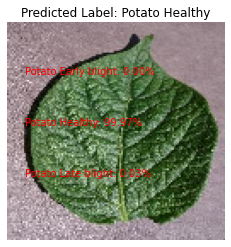

In [127]:

external_image_path = r"C:\Users\Admin\Desktop\PotatoDisease\test\Potato Healthy\PotatoHealthy(1).JPG"
external_image = image.load_img(external_image_path, target_size=image_shape[:2])
external_image = image.img_to_array(external_image)
external_image = np.expand_dims(external_image, axis=0)
external_image = external_image / 255.0  


predictions = model.predict(external_image)
predicted_class = np.argmax(predictions)


label_mapping = {0: 'Potato Early blight', 1: 'Potato Healthy', 2: 'Potato Late blight'}
predicted_label = label_mapping[predicted_class]


prediction_percentages = predictions[0] * 100


print("Predicted Label:", predicted_label)
for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    print(f"{class_label}: {percentage:.2f}%")


plt.imshow(external_image[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')

for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    plt.text(10, (i + 1) * 30, f"{class_label}: {percentage:.2f}%", color='red')

plt.show()


##### POTATO LATE BLIGHT

1/1 [==============================] - 0s 24ms/step
Predicted Label: Potato Late blight
Potato Early blight: 0.09%
Potato Healthy: 6.99%
Potato Late blight: 92.92%


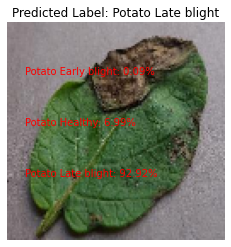

In [130]:
# Load the external image
external_image_path =r"C:\Users\Admin\Desktop\PotatoDisease\test\Potato Late blight\PotatoLateBlight(54).JPG"
external_image = image.load_img(external_image_path, target_size=image_shape[:2])
external_image = image.img_to_array(external_image)
external_image = np.expand_dims(external_image, axis=0)
external_image = external_image / 255.0  


predictions = model.predict(external_image)
predicted_class = np.argmax(predictions)


label_mapping = {0: 'Potato Early blight', 1: 'Potato Healthy', 2: 'Potato Late blight'}
predicted_label = label_mapping[predicted_class]


prediction_percentages = predictions[0] * 100


print("Predicted Label:", predicted_label)
for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    print(f"{class_label}: {percentage:.2f}%")


plt.imshow(external_image[0])
plt.title(f"Predicted Label: {predicted_label}")
plt.axis('off')

for i in range(len(label_mapping)):
    class_label = label_mapping[i]
    percentage = prediction_percentages[i]
    plt.text(10, (i + 1) * 30, f"{class_label}: {percentage:.2f}%", color='red')

plt.show()


# CONCLUSION

    The development of a CNN model for potato disease classification holds significant promise in addressing the financial losses and crop failures faced by potato farmers. By accurately identifying and classifying diseases like Early Blight and Late Blight, the model empowers farmers to take timely and effective treatment measures, thereby minimizing economic losses and ensuring crop viability.

    The CNN model for potato disease classification represents a crucial step forward in supporting potato farmers in mitigating financial losses and preventing crop failures. By accurately identifying and classifying diseases like Early Blight and Late Blight, the model equips farmers with valuable insights and empowers them to make informed decisions, fostering sustainable and profitable potato farming practices.